#### importing all the necessary libraries !


In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
train_data = pd.read_excel('Data_Train.xlsx')
train_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [203]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### Importing dataset

    1.Since data is in form of excel file we have to use pandas read_excel to load the data
    2.After loading it is important to check null values in a column or a row
    3.If it is present then following can be done,
        a.Filling NaN values with mean, median and mode using fillna() method
        b.If Less missing values, we can drop it as well


In [204]:
train_data.isnull().sum()

# train_data.isnull().sum(axis=0)
# by-default axis is 0 , ie it computes total missing values column-wise !

# train_data.isnull().sum(axis=1) -->> if axis=1 , ie it computes total missing values row-wise !

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### as we have 1 missing value , I can directly drop these


In [205]:
train_data.dropna(inplace=True)

In [206]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Pre-process & Perform Featurization of "Date_of_Journey"

    ie pre-process it & extract day,month,year from "Date_of_Journey" feature..


In [207]:
data = train_data.copy()

In [208]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [209]:
def change_into_datetime(col):
    data[col] = pd.to_datetime(data[col])

In [210]:
for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(feature)

C:\Users\batu_\AppData\Local\Temp\ipykernel_18496\1990600865.py:2: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

C:\Users\batu_\AppData\Local\Temp\ipykernel_18496\1990600865.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\batu_\AppData\Local\Temp\ipykernel_18496\1990600865.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



## lets do Feature Engineering of "Date_of_Journey" & fetch day,month,year !


In [211]:
data

Airline Date_of_Journey    Source Destination  \
0           IndiGo      2019-03-24  Banglore   New Delhi   
1        Air India      2019-05-01   Kolkata    Banglore   
2      Jet Airways      2019-06-09     Delhi      Cochin   
3           IndiGo      2019-05-12   Kolkata    Banglore   
4           IndiGo      2019-03-01  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia      2019-04-09   Kolkata    Banglore   
10679    Air India      2019-04-27   Kolkata    Banglore   
10680  Jet Airways      2019-04-27  Banglore       Delhi   
10681      Vistara      2019-03-01  Banglore   New Delhi   
10682    Air India      2019-05-09     Delhi      Cochin   

                       Route            Dep_Time        Arrival_Time Duration  \
0                  BLR → DEL 2023-09-29 22:20:00 2023-03-22 01:10:00   2h 50m   
1      CCU → IXR → BBI → BLR 2023-09-29 05:50:00 2023-09-29 13:15:00   7h 25m   
2      DEL → LKO → BOM → COK 2023-09-29 09:25:00 2023-06-10 04:25:00      19h   
3            CCU → NAG → BLR 2023-09-29 18:05:00 2023-09-29 23:30:00   5h 25m   
4            BLR → NAG → DEL 2023-09-29 16:50:00 2023-09-29 21:35:00   4h 45m   
...                      ...                 ...                 ...      ...   
10678              CCU → BLR 2023-09-29 19:55:00 2023-09-29 22:25:00   2h 30m   
10679              CCU → BLR 2023-09-29 20:45:00 2023-09-29 23:20:00   2h 35m   
10680              BLR → DEL 2023-09-29 08:20:00 2023-09-29 11:20:00       3h   
10681              BLR → DEL 2023-09-29 11:30:00 2023-09-29 14:10:00   2h 40m   
10682  DEL → GOI → BOM → COK 2023-09-29 10:55:00 2023-09-29 19:15:00   8h 20m   

      Total_Stops Additional_Info  Price  
0        non-stop         No info   3897  
1         2 stops         No info   7662  
2         2 stops         No info  13882  
3          1 stop         No info   6218  
4          1 stop         No info  13302  
...           ...             ...    ...  
10678    non-stop         No info   4107  
10679    non-stop         No info   4145  
10680    non-stop         No info   7229  
10681    non-stop         No info  12648  
10682     2 stops         No info  11753  

[10682 rows x 11 columns]

In [212]:
data['journey_day'] = data['Date_of_Journey'].dt.day
data['journey_month'] = data['Date_of_Journey'].dt.month
data['journey_year'] = data['Date_of_Journey'].dt.year

In [213]:
data.drop('Date_of_Journey', axis=1, inplace=True)

## Lets try to clean Dep_Time & Arrival_Time & featurize it..¶


In [214]:
data.head()

Airline    Source Destination                  Route  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   

             Dep_Time        Arrival_Time Duration Total_Stops  \
0 2023-09-29 22:20:00 2023-03-22 01:10:00   2h 50m    non-stop   
1 2023-09-29 05:50:00 2023-09-29 13:15:00   7h 25m     2 stops   
2 2023-09-29 09:25:00 2023-06-10 04:25:00      19h     2 stops   
3 2023-09-29 18:05:00 2023-09-29 23:30:00   5h 25m      1 stop   
4 2023-09-29 16:50:00 2023-09-29 21:35:00   4h 45m      1 stop   

  Additional_Info  Price  journey_day  journey_month  journey_year  
0         No info   3897           24              3          2019  
1         No info   7662            1              5          2019  
2         No info  13882            9              6          2019  
3         No info   6218           12              5          2019  
4         No info  13302            1              3          2019

In [215]:
def extract_hour_minute(data, col):
    data[col + "_hour"] = data[col].dt.hour
    data[col + "_minute"] = data[col].dt.minute
    data.drop(col, axis=1, inplace=True)

In [216]:
# Departure time is when a plane leaves the gate
extract_hour_minute(data, 'Dep_Time')

In [217]:
# lets Featurize 'Arrival_Time' !
extract_hour_minute(data, 'Arrival_Time')

## lets analyse when will most of the flights will take-off


<Axes: xlabel='Dep_Time_hour'>

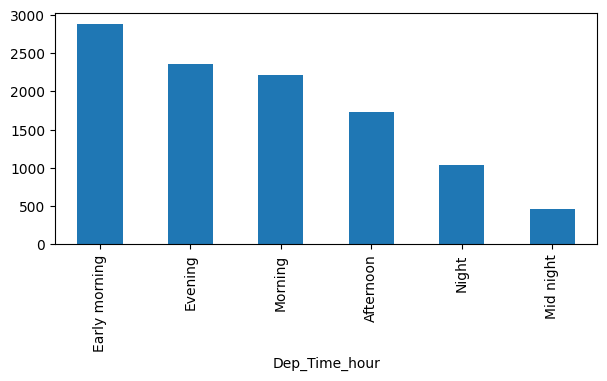

In [218]:
# Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

def flight_dep_time(x):
    '''
    This function takes the flight Departure time 
    and convert into appropriate format.
    '''

    if (x > 4) and (x <= 8):
        return 'Early morning'
    elif (x > 8) and (x <= 12):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return 'Afternoon'
    elif (x > 16) and (x <= 20):
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return 'Night'
    else:
        return 'Mid night'


data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(
    kind='bar', figsize=(7, 3))

In [219]:
results = data['Dep_Time_hour'].apply(flight_dep_time)

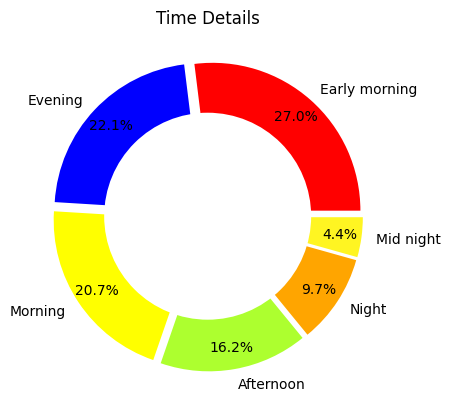

In [220]:
# Setting labels for items in Chart
times = results.value_counts().index

# Setting size in Chart based on
# given values
times_count = results.value_counts().values

# colors
colors = ['#FF0000', '#0000FF', '#FFFF00',
          '#ADFF2F', '#FFA500', '#FFF522']
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

# Pie Chart
plt.pie(times_count, colors=colors, labels=times,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Time Details')

# Displaying Chart
plt.show()

## lets use Cufflinks & plotly to make your visuals more interactive !


In [221]:
# Lets use Plotly interactive plots directly with Pandas dataframes, but First u need below set-up !

import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [222]:
cf.go_offline()

In [223]:
results.value_counts().iplot(kind="bar")

## Pre-process Duration Feature & extract meaningful features


In [224]:
def preprocess_duration(duration):
    if "h" not in duration:
        duration = "0h " + duration
    if "m" not in duration:
        duration = duration + " 0m"
    return duration


data['Duration'] = data['Duration'].apply(preprocess_duration)

In [225]:
data['Duration_hours'] = data['Duration'].apply(
    lambda x: int(x.split()[0][:-1]))

In [226]:
data['Duration_mins'] = data['Duration'].apply(
    lambda x: int(x.split()[1][:-1]))

## Lets Analyse whether Duration impacts on Price or not ?


In [227]:
# eval is a in-built function of python which evaluates the “String” like a python expression and returns the result as an integer.
eval('2*60+50*1')

170

In [228]:
data['Duration_total_mins'] = data["Duration"].str.replace(
    "h", "*60").str.replace(" ", "+").str.replace("m", "*1").apply(eval)

c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



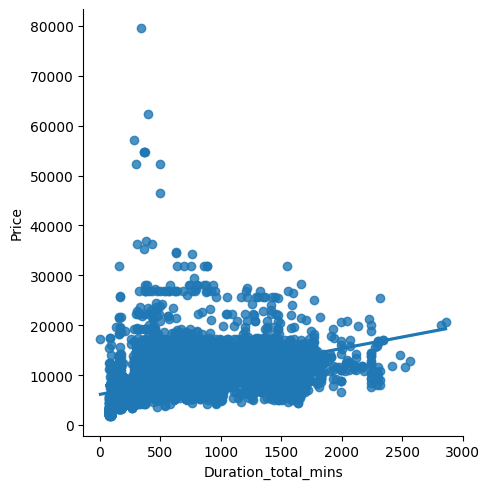

In [229]:
# It Plot data and regression model fits across a FacetGrid.. (combination of 'regplot` and :class:`FacetGrid)
# its a extended form of scatter plot..

sns.lmplot(x='Duration_total_mins', y='Price', data=data)


# Conclusion-->> pretty clear that As the duration of minutes increases Flight price also increases.

## which city has maximum final destination of flights ?


In [230]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [231]:
# data['Destination'].value_counts().plot(kind='pie')

In [232]:
dest = data['Destination'].value_counts().reset_index()
dest

Destination  count
0      Cochin   4536
1    Banglore   2871
2       Delhi   1265
3   New Delhi    932
4   Hyderabad    697
5     Kolkata    381

In [233]:
dest.iplot(kind="pie", labels="Destination",
           values="count",)

In [234]:
'''
Inference->> 
Final destination of majority of flights is Cochin. There are two values for Delhi destination which needs to be corrected,

'''

'\nInference->> \nFinal destination of majority of flights is Cochin. There are two values for Delhi destination which needs to be corrected,\n\n'

## Lets Perform Exploratory Data Analysis(Bivariate Analysis) to come up with some business insights

    Problem Statement-->> on which route Jet Airways is extremely used???


In [235]:
data[data['Airline'] == 'Jet Airways'].groupby(
    'Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

## Airline vs Price Analysis

    ie finding price distribution & 5-point summary of each Airline..


In [236]:
data[['Airline', 'Price']].pivot(columns='Airline', values='Price').iplot(
    kind="box", boxpoints="outliers")

In [237]:
# plt.figure(figsize=(15, 5))
# sns.boxplot(y='Price', x='Airline', data=data)
# plt.xticks(rotation='vertical');

In [238]:
# when we need boxplot + distribution both , its good to consider violinplot..

In [239]:
import plotly.express as px

In [240]:
px.violin(data, y="Price", x="Airline", box=True, points="outliers")

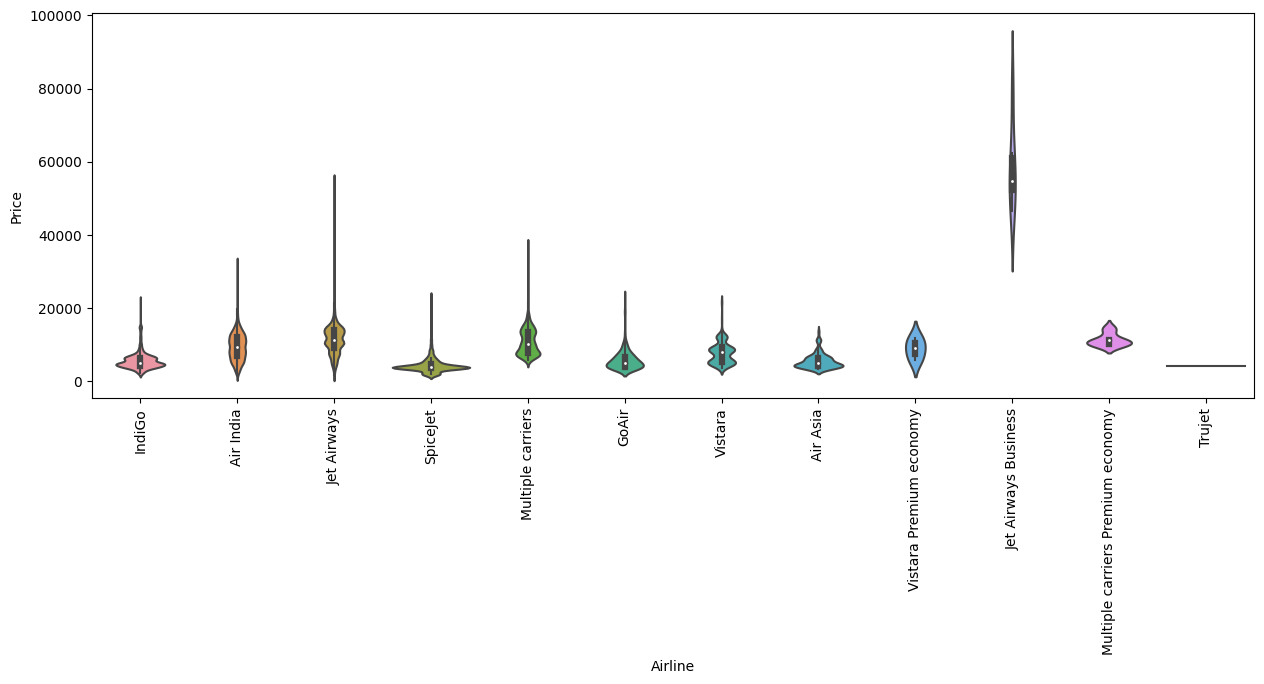

In [241]:
plt.figure(figsize=(15, 5))
sns.violinplot(y='Price', x='Airline', data=data)
plt.xticks(rotation='vertical')

## Lets Perform Feature-Encoding on Data !

    Applying one-hot on data !


In [242]:
# but lets remove some of the un-necessary features !

In [243]:
round(data["Additional_Info"].value_counts() / len(data) * 100, 2)

Additional_Info
No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: count, dtype: float64

In [244]:
# Additional_Info contains almost 80% no_info,so we can drop this column
# we can drop Route as well as we have pre-process that column
# lets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"

data.drop(columns=['Additional_Info', 'Route',
          'Duration_total_mins', 'journey_year'], axis=1, inplace=True)

## Lets separate categorical data & numerical data !

    categorical data are those whose data-type is 'object'
    Numerical data are those whose data-type is either int of float


In [245]:
cat_col = [col for col in data.columns if data[col].dtype == 'object']

In [246]:
num_col = [col for col in data.columns if data[col].dtype != 'object']

## Handling Categorical Data

    We are using 2 basic Encoding Techniques to convert Categorical data into some numerical format
    if data belongs to Nominal data (ie data is not in any order) -->> OneHotEncoder is used in this case
    if data belongs to Ordinal data (ie data is in order ) -->>       LabelEncoder is used in this case

    But in real-world , it is not necessary that u have to always One-hot or label , hence we will discuss more interesting approaches to do this !


### Lets apply one-hot encoding on 'Source' feature !


In [247]:
# One-hot from scratch :

In [248]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [249]:
for source_cat in data["Source"].unique():
    data["Source_" +
         source_cat] = data["Source"].apply(lambda x: 1 if x == source_cat else 0)

In [250]:
data.drop(["Source"], axis=1, inplace=True)

## Performing Target Guided Mean Encoding !

    ofcourse we can use One-hot , but if we have more sub-categories , it creates curse of dimensionality in ML..
    lets use Target Guided Mean Encoding in order to get rid of this..


In [251]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [252]:
dict1 = {val: idx for idx, val in enumerate(airlines)}
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [253]:
data['Airline'] = data['Airline'].map(dict1)

In [254]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [255]:
data['Destination'].replace('New Delhi', 'Delhi', inplace=True)

In [256]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [257]:
dest = data.groupby(["Destination"])["Price"].mean().sort_values().index
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [258]:
dict2 = {val: idx for idx, val in enumerate(dest)}
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [259]:
data['Destination'] = data['Destination'].map(dict2)

### Perform Manual Encoding on Total_stops feature


In [260]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [261]:
stops = {'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}

In [262]:
data['Total_Stops'] = data['Total_Stops'].map(stops)

In [263]:
data.drop("Duration", axis=1, inplace=True)

## Performing Outlier Detection !

    Here the list of data visualization plots to spot the outliers.

1. Box and whisker plot (box plot).
2. Scatter plot.
3. Histogram.
4. Distribution Plot.
5. QQ plot


C:\Users\batu_\AppData\Local\Temp\ipykernel_18496\4123275538.py:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




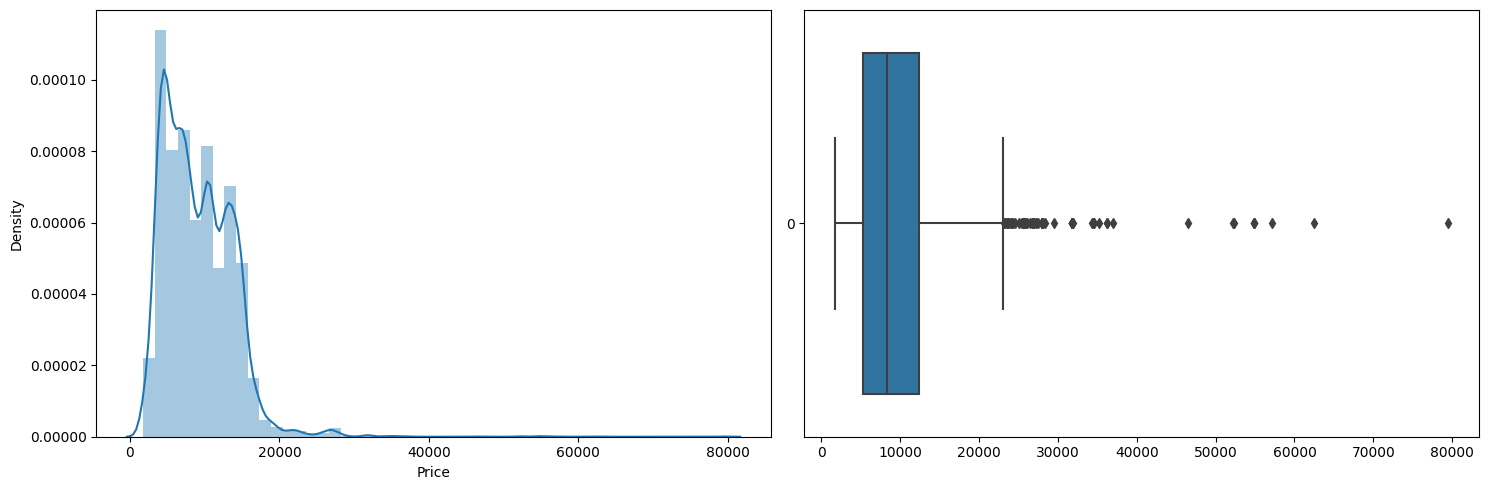

In [264]:
# def plot(df, col):
#     fig, (ax1, ax2) = plt.subplots(2, 1)
#     sns.distplot(df[col], ax=ax1, kde=True)
#     sns.boxplot(df[col], ax=ax2, orient='h')
#     plt.tight_layout()


def plot(df, col):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.distplot(df[col], kde=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(df[col], orient='h')
    plt.tight_layout()


plot(data, 'Price')

In [265]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


def iplot_func(data, col):
    fig = make_subplots(rows=1, cols=2)
    fig.add_trace(go.Histogram(x=data["Price"]), row=1, col=1)
    fig.add_trace(go.Box(x=data["Price"]), row=1, col=2)
    fig.update_layout(title_text=col)
    fig.show()


iplot_func(data, 'Price')

### getting a high level over-view of various ways to deal with outliers:


In [266]:
data['Price'] = np.where(data['Price'] >= 35000,
                         data['Price'].median(), data['Price'])

C:\Users\batu_\AppData\Local\Temp\ipykernel_18496\4123275538.py:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




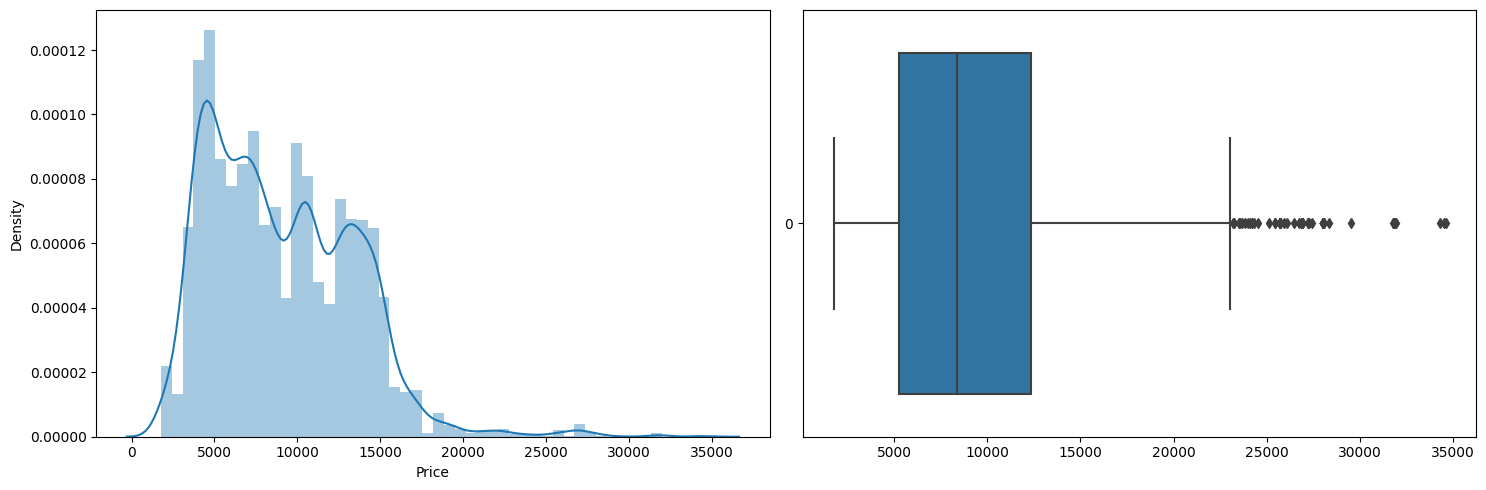

In [267]:
plot(data, 'Price')

## Performing Feature Selection !


In [270]:
from sklearn.feature_selection import mutual_info_regression

In [272]:
X = data.drop(['Price'], axis=1)
y = data['Price']

In [273]:
mutual_info_regression(X, y)

array([0.98220426, 0.99792408, 0.78817828, 0.23135735, 0.62750848,
       0.34041095, 0.26412877, 0.39826079, 0.3535033 , 0.46464778,
       0.34390248, 0.38004252, 0.45335491, 0.52104988, 0.13274493,
       0.19542073])

In [276]:
imp = pd.DataFrame(mutual_info_regression(X, y), index=X.columns)
imp.columns = ['importance']
imp.sort_values(by='importance', ascending=False)

importance
Destination            0.999989
Airline                0.973244
Total_Stops            0.796164
journey_month          0.625338
Source_Delhi           0.526941
Duration_hours         0.461353
Source_Kolkata         0.457829
Arrival_Time_hour      0.394648
Source_Banglore        0.390619
Duration_mins          0.345713
Arrival_Time_minute    0.344929
Dep_Time_hour          0.337951
Dep_Time_minute        0.248369
journey_day            0.228423
Source_Mumbai          0.200724
Source_Chennai         0.138421

## Lets build ML Model , then later on we can think of saving it..


#### split dataset into train & test


In [277]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

#### what we often do in modelling:

    a..Initially ,lets build basic random forest model.
    b..then later-on , we will try to improve this model using some parameters..
    c..Then we will hyper-tune my model to get optimal value of parameters in order to achieve optimal value of params..


In [278]:
from sklearn.ensemble import RandomForestRegressor

In [279]:
ml_model = RandomForestRegressor()

In [280]:
model = ml_model.fit(X_train, y_train)

In [281]:
y_pred = model.predict(X_test)

### How to save ML model into disk


In [283]:
import pickle

In [286]:
file = open('rf_random.pkl', 'wb')
pickle.dump(model, file)

In [287]:
model = open("rf_random.pkl", "rb")
forest = pickle.load(model)

In [288]:
forest.predict(X_test)

array([16760.27,  5514.76,  9003.82, ...,  3544.74,  6323.06,  6830.7 ])

## Defining your own evaluation metric :


In [289]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [290]:
mape(y_test, forest.predict(X_test))

13.167154462624161

In [293]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score

In [298]:
import plotly.figure_factory as ff


## How to Automate ML Pipeline :


In [311]:
def predict(ml_model):

    model = ml_model.fit(X_train, y_train)
    print('Training_score: {}'.format(model.score(X_train, y_train)))
    y_prediction = model.predict(X_test)

    print('R2 Score: ', r2_score(y_test, y_prediction))
    print('MSE: ', mean_squared_error(y_test, y_prediction))
    print('MAE: ', mean_absolute_error(y_test, y_prediction))
    print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_prediction)))
    print('MAPE: ', mape(y_test, y_prediction))

    # sns.distplot(y_test-y_prediction)

    hist_data = [y_test-y_prediction]

    fig = ff.create_distplot(hist_data, group_labels=[
                             'distplot'])
    fig.show()

In [312]:
predict(RandomForestRegressor())

Training_score: 0.9511536351894427
R2 Score:  0.8101137346219118
MSE:  3696629.796344248
MAE:  1178.0061394677643
RMSE:  1922.6621638614122
MAPE:  13.180475453254475


## how to hypertune ml model

    Hyperparameter Tuning or Hyperparameter Optimization
    1.Choose following method for hyperparameter tuning
        a.RandomizedSearchCV --> Fast way to Hypertune model
        b.GridSearchCV--> Slow way to hypertune my model
    2.Choose ML algo that u have to hypertune
    2.Assign hyperparameters in form of dictionary or create hyper-parameter space
    3.define searching &  apply searching on Training data or  Fit the CV model
    4.Check best parameters and best score


In [313]:
from sklearn.model_selection import RandomizedSearchCV

In [314]:
# initialise your estimator
reg_rf = RandomForestRegressor()

In [315]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=1000, stop=1200, num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5, 10, 15, 100]

In [317]:
# Create the grid or hyper-parameter space
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [322]:
rf_Random = RandomizedSearchCV(
    reg_rf, param_distributions=random_grid, cv=3, verbose=2, n_jobs=-1)

In [323]:
rf_Random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [324]:
# to get your best model..
rf_Random.best_params_

{'n_estimators': 1120,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 30}

In [325]:
pred2 = rf_Random.predict(X_test)

In [326]:
r2_score(y_test, pred2)

0.8306723795976896

In [327]:
predict(RandomForestRegressor(**rf_Random.best_params_))

c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Training_score: 0.9144355733160969
R2 Score:  0.829935972238389
MSE:  3310738.4099536412
MAE:  1140.2606706391623
RMSE:  1819.543461957873
MAPE:  12.776501057760061
